#Classification of Water Consumption Types

[Assignment SI - Infos](https://drive.google.com/file/d/1lh5a0YxVsC-NXtsIpucTVCrfJR_8KZB4/view?usp=sharing)

[Dataset Train](https://virtual.ipb.pt/access/content/group/5b961040-5442-11ee-bfc7-421e367e2b5a/Assignment/train.csv)

[Dataset Competition](https://virtual.ipb.pt/access/content/group/5b961040-5442-11ee-bfc7-421e367e2b5a/Assignment/competition.csv)

### 1) **IMPORT** and **UTILITY**

Import all usefull libraries and define some usefull functions

In [35]:
###########################
# data libraries
###########################
import pandas as pd
import numpy as np

###########################
# plot libraries
###########################
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

###########################
# Learn Libraries
###########################
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

###########################
# Neural Networks Libraries
###########################
import torch
import torch.nn as nn
import torch.nn.functional as F

###########################
# Another Libraries
###########################
import string
import random

print("Torch Version: ", torch.__version__)
print("Cuda is available: ", torch.cuda.is_available)

Torch Version:  2.1.1+cpu
Cuda is available:  <function is_available at 0x000002527A66CA40>


### 2) **READ DATA FILES**

In [36]:
###########################
# import csv in dataframe
###########################

train = pd.read_csv("train_without_outliers.csv")
test = pd.read_csv("competition.csv")

### 3) **PREPROCESSING**

3.1) DATA VISUALIZATION

     try to visualize data and some correlation/outliers or any possible issues

In [37]:
###########################
# see main data features
###########################
train.info()
train.head()
train["Consumer_type"].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271467 entries, 0 to 271466
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Year               271467 non-null  int64 
 1   Month              271467 non-null  int64 
 2   Consumer_type      271467 non-null  object
 3   Consumption        271467 non-null  int64 
 4   Consumer_number    271467 non-null  object
 5   Installation_zone  271467 non-null  object
dtypes: int64(3), object(3)
memory usage: 12.4+ MB


array(['domestic', 'industrial', 'rural commercial',
       'low income families', 'construction', 'rural domestic',
       'rural expansion'], dtype=object)

Test infos

In [38]:
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18279 entries, 0 to 18278
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               18279 non-null  int64 
 1   Month              18279 non-null  int64 
 2   Consumption        18279 non-null  int64 
 3   Consumer_number    18279 non-null  object
 4   Installation_zone  18279 non-null  object
dtypes: int64(3), object(2)
memory usage: 714.2+ KB


,Year,Month,Consumption,Consumer_number,Installation_zone
0,2013,1,1,VENX08444954462680,Installation_zone 1
1,2013,1,2,GRXC33020746550125,Installation_zone 1
2,2013,1,1,FCGQ19814303536339,Installation_zone 1
3,2013,1,5,EQKL85694875580467,Installation_zone 3
4,2013,1,14,KCXW91343862250032,Installation_zone 3


Para facilitar vamos codificar os objetos (Strings) em números

In [39]:
columns = ["Consumer_type","Consumer_number","Installation_zone"]
for feature in columns:
  le = LabelEncoder()
  train[feature] = le.fit_transform(train[feature])

train.head()

,Year,Month,Consumer_type,Consumption,Consumer_number,Installation_zone
0,2013,1,1,0,7352,0
1,2013,1,1,6,12578,11
2,2013,1,1,1,9603,11
3,2013,1,1,13,4674,11
4,2013,1,2,5,423,11


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271467 entries, 0 to 271466
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Year               271467 non-null  int64
 1   Month              271467 non-null  int64
 2   Consumer_type      271467 non-null  int32
 3   Consumption        271467 non-null  int64
 4   Consumer_number    271467 non-null  int32
 5   Installation_zone  271467 non-null  int32
dtypes: int32(3), int64(3)
memory usage: 9.3 MB


vamos retirar uma porcentagem de consumidores domésticos

In [41]:
# indices_tipo_0 = train[train['Consumer_type'] == 0].index

###### removendo consumidores domesticos
# indices_tipo_1 = train[train['Consumer_type'] == 1].index
# quantidade_reduzida_tipo_1 = int(len(indices_tipo_1) * 0.99)
# indices_reduzidos_1 = indices_tipo_1[:quantidade_reduzida_tipo_1]

# train.drop(indices_reduzidos_1, inplace=True)
# train.info()


###### removendo consumidores indutrial
# indices_tipo_2 = train[train['Consumer_type'] == 2].index
# quantidade_reduzida_tipo_2 = int(len(indices_tipo_2) * 0.82)
# indices_reduzidos_2 = indices_tipo_2[:quantidade_reduzida_tipo_2]

# train.drop(indices_reduzidos_2, inplace=True)
# train.info()

###### removendo consumidores construction
# indices_tipo_3 = train[train['Consumer_type'] == 3].index
# quantidade_reduzida_tipo_3 = int(len(indices_tipo_3) * 0.90)
# indices_reduzidos_3 = indices_tipo_3[:quantidade_reduzida_tipo_3]

# train.drop(indices_reduzidos_3, inplace=True)
# train.info()

###### removendo consumidores low income families
# indices_tipo_4 = train[train['Consumer_type'] == 4].index
# quantidade_reduzida_tipo_4 = int(len(indices_tipo_4) * 0.68)
# indices_reduzidos_4 = indices_tipo_4[:quantidade_reduzida_tipo_4]

# train.drop(indices_reduzidos_4, inplace=True)
# train.info()

###### removendo consumidores rural domestic
# indices_tipo_5 = train[train['Consumer_type'] == 5].index
# quantidade_reduzida_tipo_5 = int(len(indices_tipo_5) * 0.95)
# indices_reduzidos_5 = indices_tipo_5[:quantidade_reduzida_tipo_5]

# train.drop(indices_reduzidos_5, inplace=True)
# train.info()

# indices_tipo_6 = train[train['Consumer_type'] == 6].index







Nossos dados ficam como mostra o histograma

<Axes: xlabel='Installation_zone', ylabel='Count'>

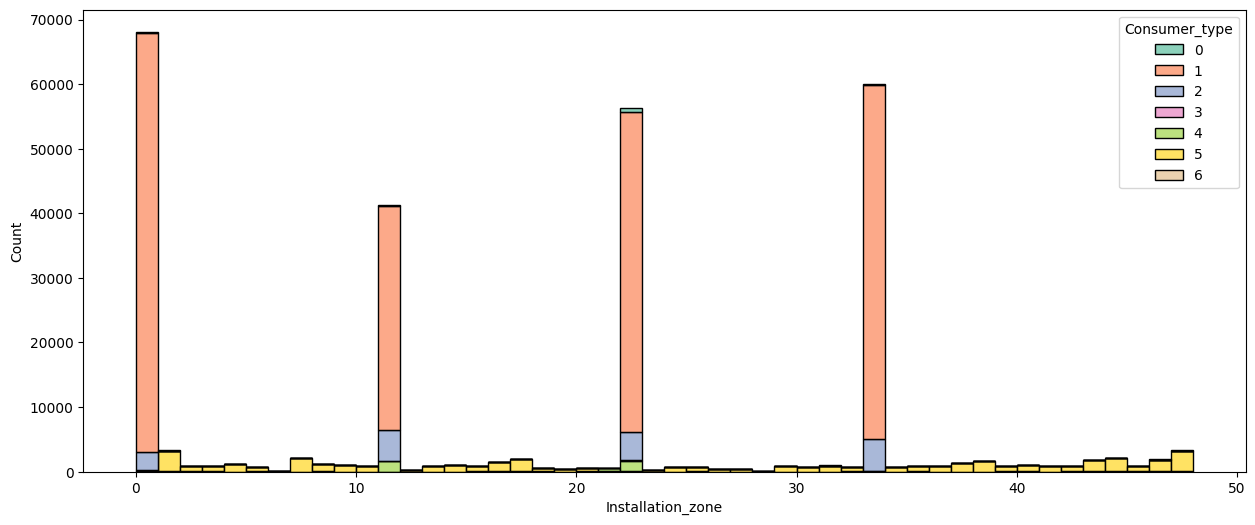

In [42]:
plt.figure(figsize = (15, 6))
sns.histplot(data = train, x='Installation_zone',hue='Consumer_type',multiple="stack",palette='Set2')

Para um melhor entendimento, vamos gerar uma tabela com a quantidade de consumidores em cada zona

In [43]:
count_table = train.groupby(['Installation_zone', 'Consumer_type']).size().unstack(fill_value=0)
print(count_table)
print(train['Consumer_type'].value_counts())

Consumer_type        0      1     2    3     4     5   6
Installation_zone                                       
0                  164  64896  2878  165    38     0   0
1                   17      0     0    0     0  3203  59
2                   11      0     0    0     0   795  13
3                    0      0    10    0     0   891  13
4                    0      0     0    0     0  1166   0
5                    0      0     0    0     0   735  48
6                    0      0     0    0     0   157   0
7                    0      0    36    0     0  2078   0
8                    0      0     0    0     0  1157  44
9                   20      0     0    0     0  1060   0
10                   0      0     0    0     0   866   0
11                 162  34654  4779   18  1620     0  11
12                   0      0     0    0     0   264   0
13                   0      0     0    0     0   821   0
14                   0      0     0    0     0   959   0
15                  10      0  

Novo dataset

In [44]:
quantidade_desejada = 1000
novo_dataset = train.groupby('Consumer_type').apply(lambda x: x.sample(min(len(x), quantidade_desejada)))
novo_dataset.reset_index(drop=True, inplace=True)
print(novo_dataset.info())
print(novo_dataset['Consumer_type'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6232 entries, 0 to 6231
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Year               6232 non-null   int64
 1   Month              6232 non-null   int64
 2   Consumer_type      6232 non-null   int32
 3   Consumption        6232 non-null   int64
 4   Consumer_number    6232 non-null   int32
 5   Installation_zone  6232 non-null   int32
dtypes: int32(3), int64(3)
memory usage: 219.2 KB
None
Consumer_type
0    1000
1    1000
2    1000
4    1000
5    1000
6     721
3     511
Name: count, dtype: int64


Normalização dos dados

In [45]:
scaler = StandardScaler()

normalized_data = scaler.fit_transform(train.drop(columns=["Consumer_type"]))
df_normalized = pd.DataFrame(normalized_data, columns = ["Year", "Month", "Consumption", "Consumer_number", "Installation_zone"])
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271467 entries, 0 to 271466
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271467 non-null  float64
 1   Month              271467 non-null  float64
 2   Consumption        271467 non-null  float64
 3   Consumer_number    271467 non-null  float64
 4   Installation_zone  271467 non-null  float64
dtypes: float64(5)
memory usage: 10.4 MB


Vamos montar nossos dados de teste e treino

In [46]:
y = train["Consumer_type"]
x = df_normalized[["Year", "Month", "Consumption", "Installation_zone"]]

In [47]:
X = torch.tensor(x.values, dtype = torch.float)
Y = torch.LongTensor(y.values)


In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, shuffle=True)
# Year	Month	Consumption	Consumer_number	Installation_zone
weights = np.ones(len(x_train))  
weights[train.columns.get_loc('Year')] = 1.0
weights[train.columns.get_loc('Month')] = 1.0
weights[train.columns.get_loc('Consumption')] = 3.0
weights[train.columns.get_loc('Consumer_number')] = 1.0 
weights[train.columns.get_loc('Installation_zone')] = 2.8

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingClassifier

model = HistGradientBoostingClassifier()  
model.fit(x_train, y_train, sample_weight=weights)

HistGradientBoostingClassifier()

Aqui vamos modelar nossa rede conforme queremos

In [49]:
class NN_model(nn.Module):
    def __init__(self):
        super(NN_model, self).__init__()
        self.linear_nn_stack = nn.Sequential(
            nn.Linear(4, 8),
            nn.Sigmoid(),
            nn.Linear(8, 8),
            nn.ReLU(),
            # nn.Linear(10, 12),
            # nn.Sigmoid(),
            # nn.Linear(12, 8),
            # nn.ReLU(),
            nn.Linear(8, 7),
            nn.Softmax(),
        )

    def forward(self, x):
        logits = self.linear_nn_stack(x)
        return logits

In [50]:
model = NN_model()

learning_rate = 1e-2
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), learning_rate)

Aqui vamos treinar nosso modelo com "n" épocas

In [51]:
epochs = 5000
train_losses=[]

for i in range(epochs):
    i= i+1
    y_pred=model.forward(x_train)
    loss=criterion(y_pred,y_train)
    train_losses.append(loss)
    if i % 10 == 0:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

c:\Users\Emers\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch number: 10 and the loss : 1.9046177864074707
Epoch number: 20 and the loss : 1.8257044553756714
Epoch number: 30 and the loss : 1.6751515865325928
Epoch number: 40 and the loss : 1.5050601959228516
Epoch number: 50 and the loss : 1.436000943183899
Epoch number: 60 and the loss : 1.4215738773345947
Epoch number: 70 and the loss : 1.4181329011917114
Epoch number: 80 and the loss : 1.4169706106185913
Epoch number: 90 and the loss : 1.416441798210144
Epoch number: 100 and the loss : 1.416137456893921
Epoch number: 110 and the loss : 1.415929913520813
Epoch number: 120 and the loss : 1.4157721996307373
Epoch number: 130 and the loss : 1.4156453609466553
Epoch number: 140 and the loss : 1.415539264678955
Epoch number: 150 and the loss : 1.4154490232467651
Epoch number: 160 and the loss : 1.4153716564178467
Epoch number: 170 and the loss : 1.4153043031692505
Epoch number: 180 and the loss : 1.415245532989502
Epoch number: 190 and the loss : 1.4151939153671265
Epoch number: 200 and the l

Curva de perdas com o passar dos treinos pelas épocas

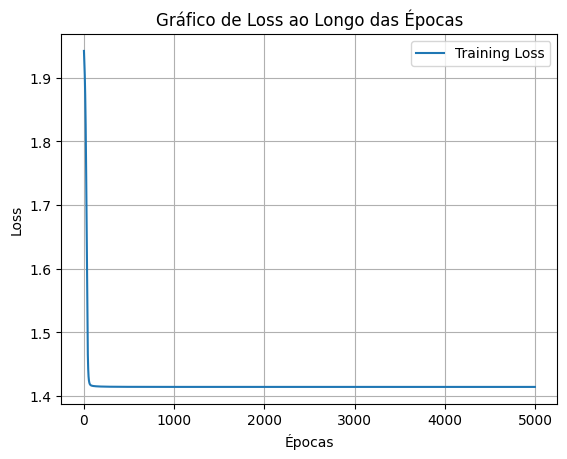

In [52]:
losses = torch.tensor(train_losses,requires_grad=True)

plt.plot(losses.detach().numpy(), label='Training Loss')
plt.title('Gráfico de Loss ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Cálculo da acurácia

In [53]:
indices_maior_valor = torch.argmax(y_pred, dim=1)
maiores_valores = y_pred[torch.arange(len(y_pred)), indices_maior_valor]
accuracy = (torch.argmax(y_pred, 1) == y_train).float().mean()
accuracy

tensor(0.7508)

Matriz de confusão

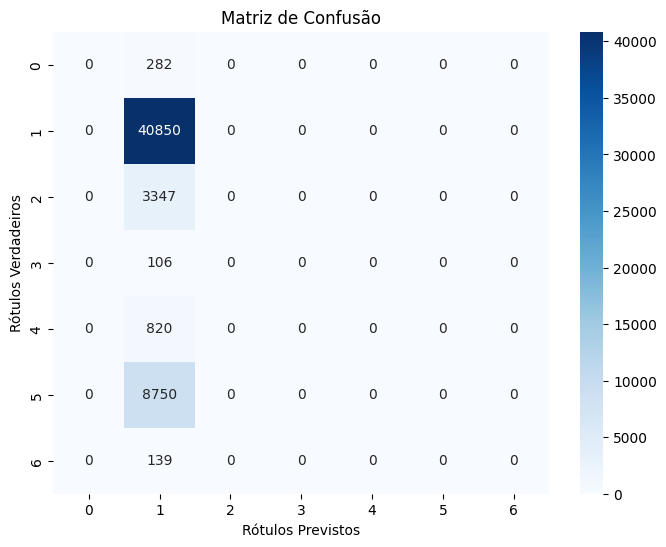

In [54]:
y_test_pred = model(x_test)
y_test_pred = torch.argmax(y_test_pred, dim=1)

predicted = y_test_pred.numpy()
targets = y_test.numpy()

conf_matrix = confusion_matrix(targets, predicted)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.show()